In [1]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ath = pd.read_csv('data/Olympics/athlete_events.csv')
noc = pd.read_csv('data/Olympics/noc_regions.csv')

In [3]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
ath_df = ath.merge(
    noc, how='left', on='NOC'
)
ath_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
ath_df.rename(
    columns={'region':'Region', 'notes':'Notes'}, inplace=True
)

In [7]:
ath_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [8]:
ath_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
ath_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [10]:
ath_df.query('Team == "Ghana"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
800,458,Felix Ahmed Aboagye,M,20.0,176.0,70.0,Ghana,GHA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,NaN,Ghana,NaN
1189,667,"Benjamin ""Ben"" Acheampong",M,25.0,161.0,62.0,Ghana,GHA,1964 Summer,1964,Summer,Tokyo,Football,Football Men's Football,NaN,Ghana,NaN
1190,668,Gemma Acheampong,F,23.0,163.0,54.0,Ghana,GHA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Ghana,NaN
1191,669,Joachim Yaw Acheampong,M,18.0,181.0,73.0,Ghana,GHA,1992 Summer,1992,Summer,Barcelona,Football,Football Men's Football,Bronze,Ghana,NaN
1294,728,George Wilson Acquaah,M,26.0,NaN,NaN,Ghana,GHA,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Men's 100 metres,NaN,Ghana,NaN


In [11]:
ath_df.query('Team == "Nigeria"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
211,101,Adeyemi Abayomi,M,25.0,170.0,51.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Boxing,Boxing Men's Lightweight,NaN,Nigeria,NaN
544,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 100 metres,NaN,Nigeria,NaN
545,313,"Lawal Kolawole ""Kola"" Abdulai",M,21.0,172.0,66.0,Nigeria,NGR,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Nigeria,NaN
546,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN,Nigeria,NaN
547,313,"Lawal Kolawole ""Kola"" Abdulai",M,25.0,172.0,66.0,Nigeria,NGR,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 4 x 100 metres Relay,NaN,Nigeria,NaN


In [12]:
winter_sports = ath_df.query('Season == "Winter"').Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [13]:
summer_sports = ath_df[ath_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [14]:
#No. of Sports Over The Years
summer_olymps = ath_df.loc[ath_df['Season']=='Summer', ['Year', 'Sport']]
summer_olymps = summer_olymps.groupby('Year').nunique().reset_index()
winter_olymps = ath_df.loc[ath_df['Season']=='Winter', ['Year', 'Sport']]
winter_olymps = winter_olymps.groupby('Year').nunique().reset_index()

Text(0, 0.5, 'Total Number of Sports')

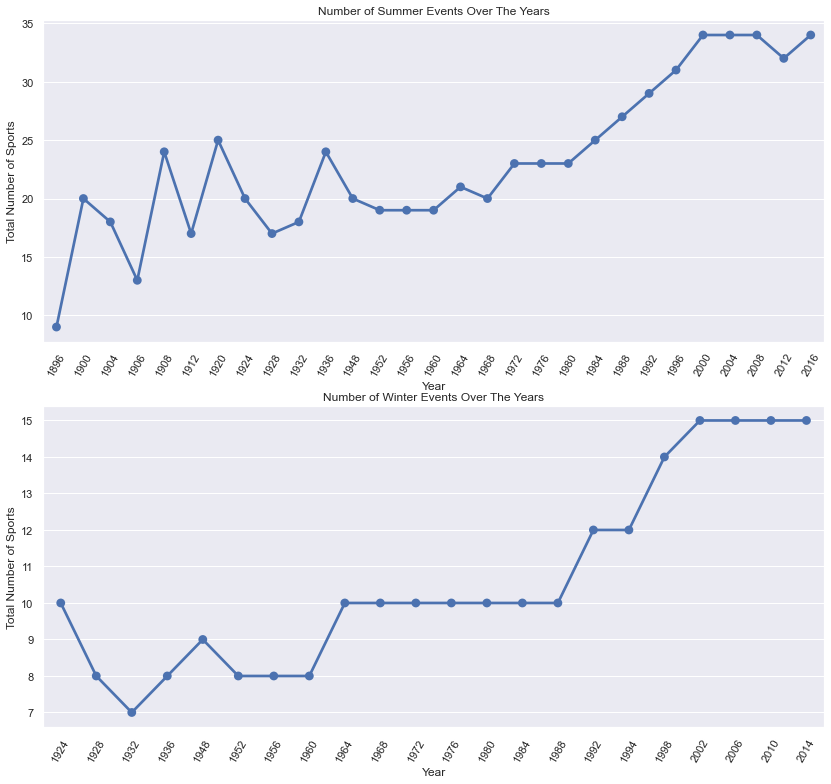

In [15]:
sns.set(style='darkgrid')
plt.figure(figsize=(14,13))

plt.subplot(211)
plt.xticks(rotation=60)
sns.pointplot(summer_olymps.Year, summer_olymps.Sport)
plt.title('Number of Summer Sports Over The Years')
plt.ylabel('Total Number of Sports')

plt.subplot(212)
plt.xticks(rotation=60)
sns.pointplot(winter_olymps.Year, winter_olymps.Sport)
plt.title('Number of Winter Sports Over The Years')
plt.ylabel('Total Number of Sports')

In [16]:
#Countries with The Most Medals
top_10_countries = ath_df.Team.value_counts().nlargest(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Overall Participation by Country'}, ylabel='Team'>

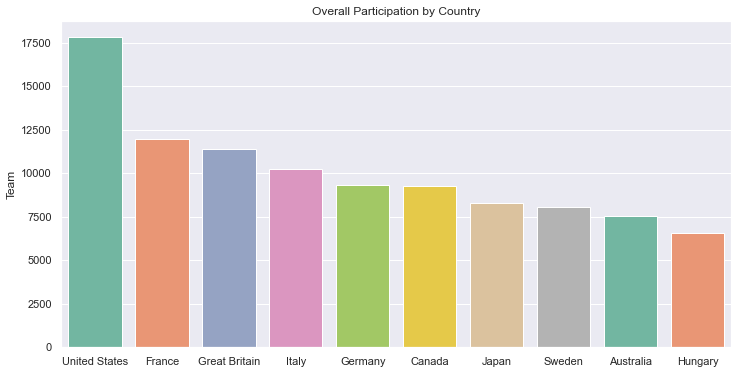

In [17]:
#Plot for top 10 countries
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Overall Participation by Country")
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='Set2')

Text(0, 0.5, 'Number of participants')

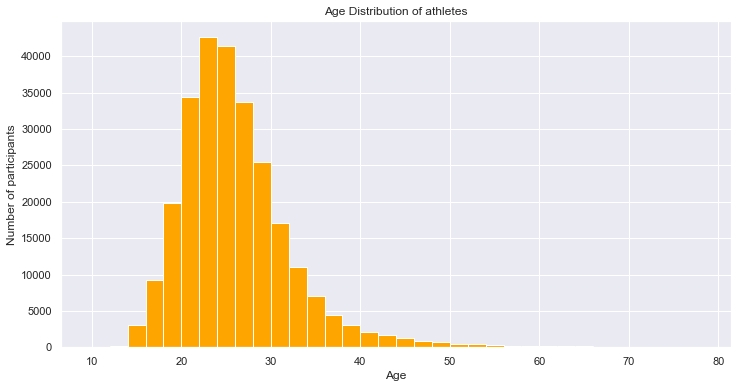

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(ath_df.Age, bins=np.arange(10, 80, 2), color='orange', edgecolor='white')
plt.title("Age Distribution of athletes")
plt.xlabel('Age')
plt.ylabel('Number of participants')

In [19]:
# Male and Female participants
gender_counts = ath_df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

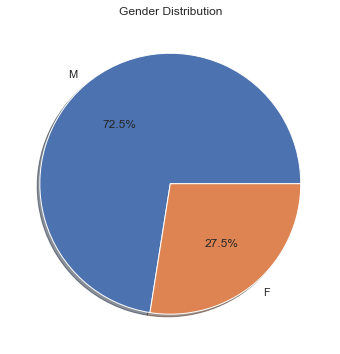

In [20]:
# Pie plot for male and female participants
fig, ax=plt.subplots(figsize=(12, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=360, shadow=True)
plt.title('Gender Distribution')

In [21]:
# Total Medals
ath_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [22]:
fem_summer = ath_df.query('Sex=="F" and Season=="Summer"')[['Sex','Year']]
fem_summer = fem_summer.groupby(['Year']).count().reset_index().rename(columns={'Sex':'F'})
fem_summer.head()

,Year,F
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [23]:
male_summer = ath_df.query('Sex=="M" and Season=="Summer"')[['Sex','Year']]
male_summer = male_summer.groupby('Year').count().reset_index().rename(columns={'Sex':'M'})
male_summer.head()

,Year,M
0,1896,380
1,1900,1903
2,1904,1285
3,1906,1722
4,1908,3054


In [24]:
fem_male_summer = male_summer.merge(
    fem_summer, how='left', on='Year'
).fillna(0)
fem_male_summer.head()

,Year,M,F
0,1896,380,0.0
1,1900,1903,33.0
2,1904,1285,16.0
3,1906,1722,11.0
4,1908,3054,47.0


Text(0.5, 1.0, 'Summer Olympics based on Gender')

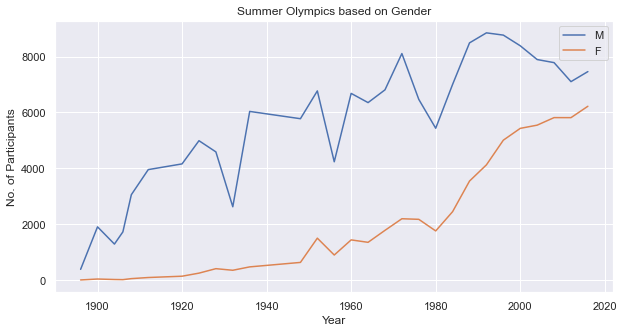

In [25]:
#Plotting Participation based on Gender
fem_male_summer.plot(x='Year', figsize=(10,5))
plt.ylabel('No. of Participants')
plt.title('Summer Olympics based on Gender')

In [26]:
fem_winter = ath.query('Sex=="F" and Season=="Winter"')[['Sex', 'Year']]
fem_winter = fem_winter.groupby('Year').count().reset_index().rename(columns={'Sex':'F'})
fem_winter.head()

,Year,F
0,1924,17
1,1928,33
2,1932,22
3,1936,81
4,1948,133


In [27]:
male_winter = ath_df.query('Sex=="M" and Season=="Winter"')[['Sex','Year']]
male_winter = male_winter.groupby('Year').count().reset_index().rename(columns={'Sex':'M'})
male_winter.head()

,Year,M
0,1924,443
1,1928,549
2,1932,330
3,1936,814
4,1948,942


In [28]:
fem_male_winter = male_winter.merge(
    fem_winter, how='left', on='Year'
)
fem_male_winter.head()

,Year,M,F
0,1924,443,17
1,1928,549,33
2,1932,330,22
3,1936,814,81
4,1948,942,133


Text(0.5, 1.0, 'Winter Olympics based on Gender')

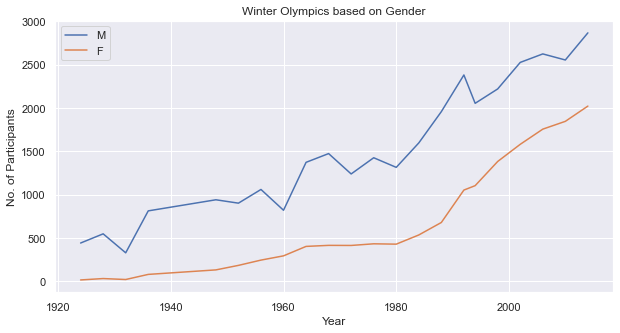

In [29]:
fem_male_winter.plot(x='Year', figsize=(10,5))
plt.ylabel('No. of Participants')
plt.title('Winter Olympics based on Gender')

In [30]:
fem_olymps_summer = ath_df.query('Sex=="F" and Season=="Summer"')
fem_olymps_winter = ath_df.query('Sex=="F" and Season=="Winter"')

Text(0.5, 1.0, 'Women Summer Participation')

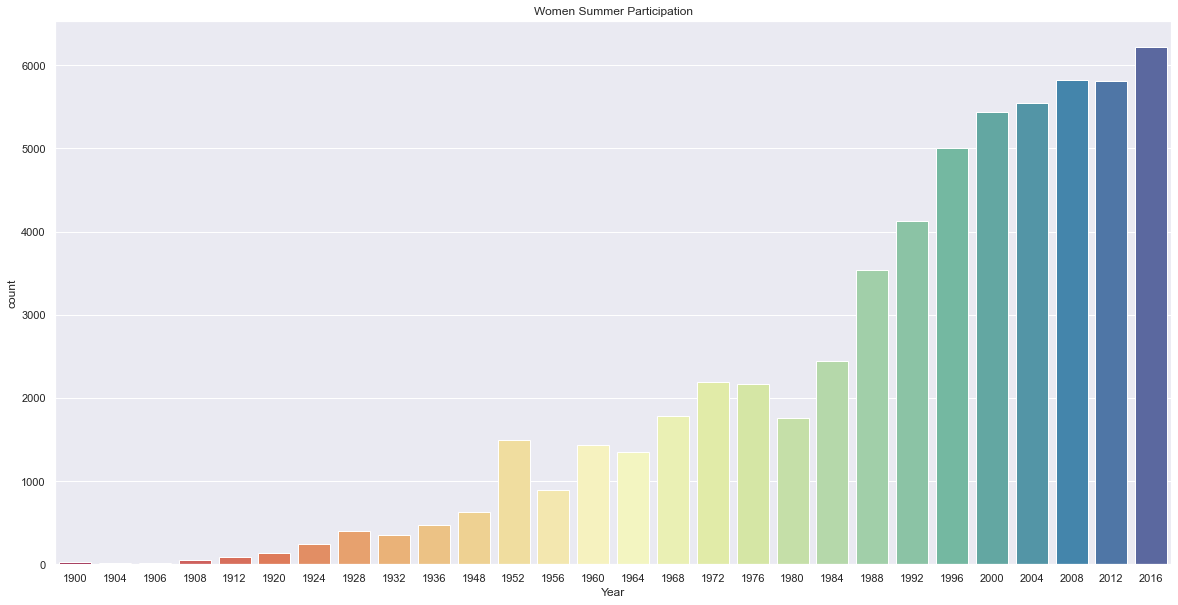

In [31]:
#Plotting Participation during Summer
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='Year', data=fem_olymps_summer, palette='Spectral')
ax.set_title("Women Summer Participation")

Text(0.5, 1.0, 'Women Winter Participation')

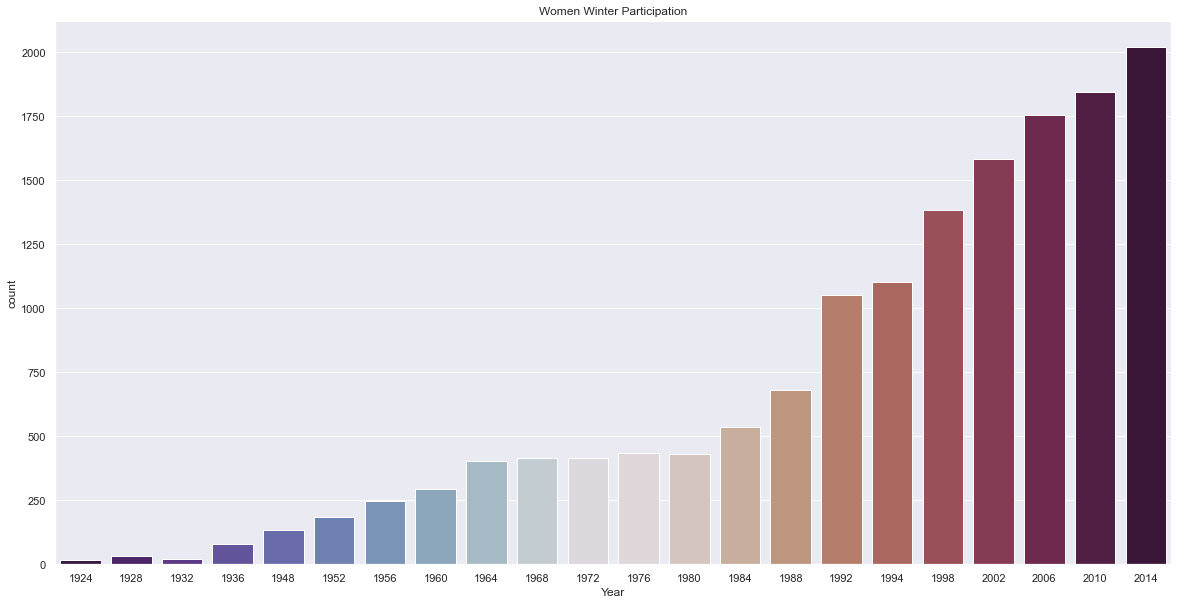

In [32]:
#Plotting Participation during Winter
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='Year', data=fem_olymps_winter, palette='twilight_shifted')
ax.set_title('Women Winter Participation')

In [33]:
#Participation of the Elderly 
young_at_heart = ath_df.query('Age>=60 and Year >= 1980')

Text(0.5, 1.0, 'Elderly Participation')

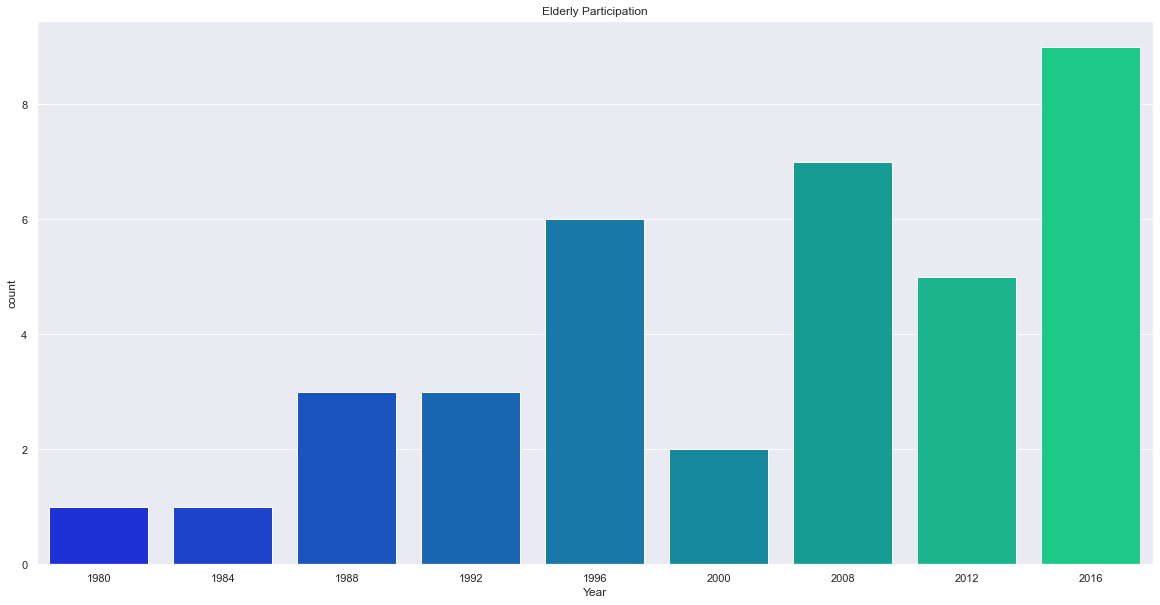

In [34]:
#Plot of Elderly Participation
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='Year', data=young_at_heart, palette='winter')
ax.set_title("Elderly Participation")

In [35]:
# Gold medal athletes
gold_medals = ath_df[ath_df.Medal=='Gold']
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [36]:
#Gold medalists 60 years and over
gold_medals['ID'][gold_medals.Age>60].count()

6

In [37]:
#Events the medals were earned
gold_events = gold_medals['Sport'][gold_medals.Age>60]
gold_events

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

Text(0.5, 1.0, 'Gold medals for athletes over 60')

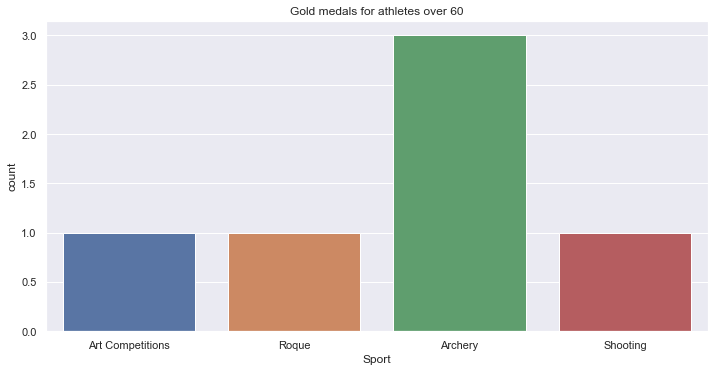

In [38]:
#Plotting gold events
fig, ax = plt.subplots(figsize=(10,5))
plt.tight_layout()
sns.countplot(gold_events)
ax.set_title('Gold medals for athletes over 60')

In [39]:
#Gold medals from each country
gold_medals.Region.value_counts().reset_index(name='Medal').head()

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


Text(0, 0.5, 'Number of medals')

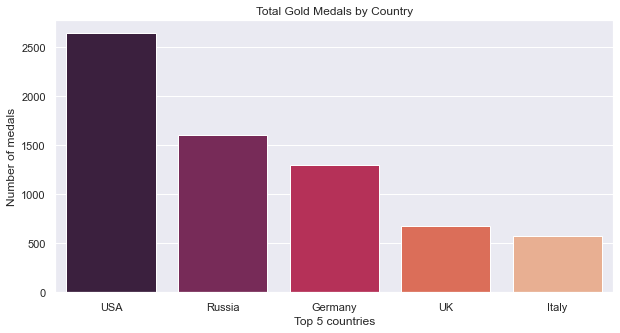

In [40]:
totalGoldMedals = gold_medals.Region.value_counts().reset_index(name='Medal').head()
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='index', y='Medal', data=totalGoldMedals, palette='rocket')
plt.title('Total Gold Medals by Country')
plt.xlabel('Top 5 countries')
plt.ylabel('Number of medals')

In [41]:
#Rio Olympics
max_year = ath_df.Year.max()
max_year

2016

In [42]:
team_names = ath_df[(ath_df.Year==max_year) & (ath_df.Medal=='Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0, 0.5, 'Teams')

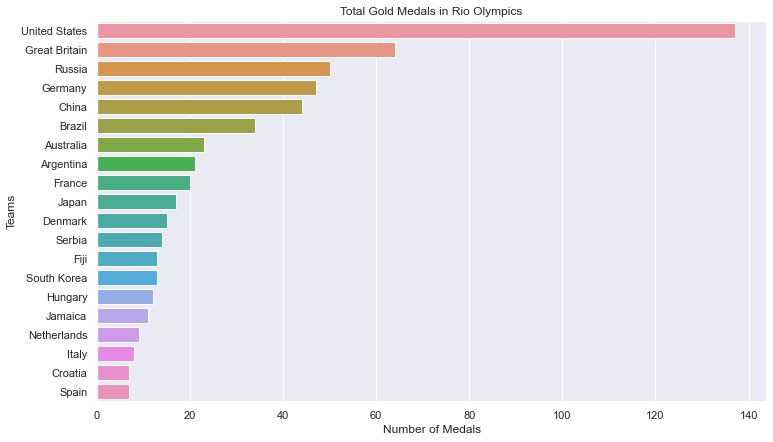

In [43]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.title('Total Gold Medals in Rio Olympics')
plt.xlabel('Number of Medals')
plt.ylabel('Teams')

In [44]:
not_null_medals = ath_df[(ath_df.Height.notnull()) & (ath_df.Weight.notnull()) & (ath_df.Medal.notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Athletes')

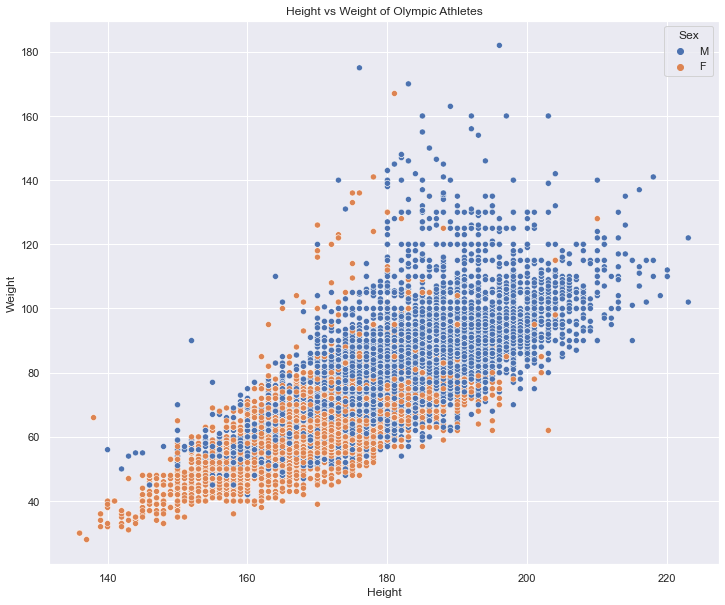

In [45]:
fig, ax = plt.subplots(figsize=(12, 10))
axis = sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex')
ax.set_title('Height vs Weight of Olympic Athletes')